In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.image as mpimg
from matplotlib import colors
from matplotlib.cm import get_cmap
from plot_utils import set_size
from matplotlib.patches import Patch

In [2]:
plt.rcParams['font.size'] = 7                  # Schriftgroesse
plt.rcParams['axes.titlesize'] = 8
plt.rcParams['lines.linewidth'] = 1           # Linienbreite
plt.rcParams['lines.markersize'] = 3
plt.rcParams['figure.figsize'] = set_size(252,subplots=(2,2))
plt.rcParams['figure.figsize'][1] *= 1.3
plt.rcParams['xtick.major.size'] = 3
plt.rcParams['xtick.major.width'] = 0.5
plt.rcParams['xtick.minor.size'] = 1.
plt.rcParams['xtick.minor.width'] = 0.5
plt.rcParams['ytick.major.size'] = 3
plt.rcParams['ytick.major.width'] = 0.5
plt.rcParams['ytick.minor.size'] = 1.
plt.rcParams['ytick.minor.width'] = 0.5
plt.rcParams['xtick.major.pad']=1.5
plt.rcParams['ytick.major.pad']=1.5
plt.rcParams['legend.fontsize'] = 7
plt.rcParams['legend.handlelength'] = plt.rcParams['legend.handleheight']
plt.rcParams['legend.columnspacing'] = 0.8
plt.rcParams['legend.handletextpad'] = 0.4
plt.rcParams['axes.linewidth'] = 0.5

max_deg = 7
cmap = get_cmap('CMRmap')
data_color = np.linspace(0.8,0.1,max_deg)
degree_colors = cmap(data_color)

fmt = 'eps'

/tmp/ipykernel_127873/1630822539.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('CMRmap')


In [3]:
sigmas = np.arange(0,20)

gamma1 = 180
beta1 = 0.4
phi1 = 687

gamma2 = 60
beta2 = 0.4
phi2 = 687

caps1 = np.zeros((sigmas.size,max_deg))
caps2 = np.zeros((sigmas.size,max_deg))

for i,sigma in enumerate(sigmas):
        path1 = '../data/capacities/phi_sweep_gamma'+str(gamma1)+'_beta'+str(beta1).replace('.','-')+'_long/corresponding_simulation/noise/'
        filename1 = 'results_sim_final_sigma'+str(sigma)+'_gamma'+str(gamma1)+'_beta'+str(beta1).replace('.','-')+'.dat'
        sigma_caps = np.genfromtxt(path1+filename1)
        phi_caps = sigma_caps[sigma_caps[:,0]==phi1]
        caps1[i] = phi_caps[:,1:-1]

        path2 = '../data/capacities/phi_sweep_gamma'+str(gamma2)+'_beta'+str(beta2).replace('.','-')+'_long/corresponding_simulation/noise/'
        filename2 = 'results_sim_final_sigma'+str(sigma)+'_gamma'+str(gamma2)+'_beta'+str(beta2).replace('.','-')+'.dat'
        sigma_caps = np.genfromtxt(path2+filename2)
        phi_caps = sigma_caps[sigma_caps[:,0]==phi2]
        caps2[i] = phi_caps[:,1:-1]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


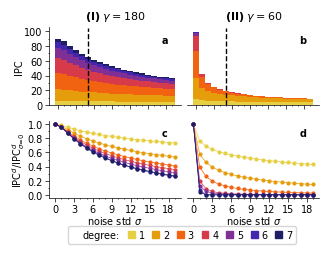

In [4]:
raster = True
dpi = 300


fig = plt.figure()
gs = GridSpec(2,2,figure=fig,wspace=0.05,bottom=0.27)

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])

ax1.set_ylabel('IPC',labelpad=0.5)
ax3.set_ylabel('IPC'+r'$^d$' + '/' + 'IPC' +r'$_{\sigma \! = \! 0}^d$',labelpad=0.5)

ax1.set_ylim([0,105])
ax2.set_ylim([0,105])
ax1.set_yticks(np.arange(0,120,20))
ax2.set_yticks(np.arange(0,120,20))

ax1.set_yticks(np.arange(0,100,10),minor=True)
ax2.set_yticks([])
ax2.set_yticklabels([])

ax3.set_ylim([-0.05,1.05])
ax4.set_ylim([-0.05,1.05])

ticksteps_caps = 3
ax1.set_xticks(sigmas,minor=True)
ax1.set_xticks(sigmas[::ticksteps_caps])
ax1.set_xticklabels([])
ax2.set_xticks(sigmas,minor=True)
ax2.set_xticks(sigmas[::ticksteps_caps])
ax2.set_xticklabels([])

ax3.set_xticks(sigmas,minor=True)
ax3.set_xticks(sigmas[::ticksteps_caps])

ax4.set_xticks(sigmas,minor=True)
ax4.set_xticks(sigmas[::ticksteps_caps])

ax3.set_yticks([0,0.2,0.4,0.6,0.8,1])
ax3.set_yticks(np.arange(0,1,0.1),minor=True)
ax4.set_yticks([])

ax3.set_xlabel('noise std '+r'$\sigma$',labelpad=0.01)
ax4.set_xlabel('noise std '+r'$\sigma$',labelpad=0.01)

# removing spines
for ax in [ax1,ax2,ax3,ax4]:
    ax.spines['top'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['right'].set_visible(False)

ax2.spines['left'].set_visible(False)
ax4.spines['left'].set_visible(False)

width = 1
interim = np.zeros((3,sigmas.size))
for d in range(max_deg):
    ax1.bar(sigmas,caps1[:,d],bottom=interim[0],width=width,color=degree_colors[d],rasterized=raster,zorder=2)
    interim[0] += caps1[:,d]

    ax2.bar(sigmas,caps2[:,d],bottom=interim[1],width=width,color=degree_colors[d],rasterized=raster,zorder=2)
    interim[1] += caps2[:,d]
    
    
    ax3.plot(sigmas,caps1[:,d]/caps1[0,d],label=d+1,lw=0.5,marker='o',color=degree_colors[d],rasterized=False,markersize=2)
    
    ax4.plot(sigmas,caps2[:,d]/caps2[0,d],label=d+1,lw=0.5,marker='o',color=degree_colors[d],rasterized=False,markersize=2)

ax1.set_title(r'$\mathbf{(I)}$ '+r'$\gamma=180$')
ax2.set_title(r'$\mathbf{(II)}$ '+r'$\gamma=60$')

ax1.axvline(x=5,ls='--',color='black',zorder=2,ymax=0.99)
ax2.axvline(x=5,ls='--',color='black',zorder=2,ymax=0.99)

# legend
ph = [plt.plot([],marker="", ls="")[0]]
handles = ph + [Patch(color=degree_colors[d]) for d in range(max_deg)]
labels = ['degree:'] + [str(d+1) for d in range(max_deg)]
leg = plt.legend(ncol=max_deg+1,loc='lower center',bbox_to_anchor=(-0.04,-0.65),handles=handles,labels=labels,labelspacing=0.6)

# denote every subplot with a letter for reference
for ax,letter in zip([ax1,ax2,ax3,ax4],'abcd'):
    ax.text(0.85,0.8,r'$\mathbf{{{}}}$'.format(letter),transform=ax.transAxes)
    
plt.savefig(fmt+'/fig09_noise_decay.'+fmt,bbox_inches='tight',dpi=dpi)